# Bootstrap Confidence Intervals

In [1]:
import numpy as np
np.random.seed(1)
import pandas as pd
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 

A `bootstrap` test is a resampling method used to estimate the sampling distribution of a statistic by repeatedly drawing random samples with replacements from the observed data and recalculating the test statistic for each sample.

Advantages:
- Bootstrap can obtain confidence intervals in any statistics.
- Bootstrap does not assume anything about the distribution.
- Bootstrap helps when there are too few samples.

`Bootstrap Confidence Intervals`: consists of using the bootstrap resampling method as a non-parametric technique for calculating confidence intervals.

## The Data

In [2]:
# Generating 1000 age values of fictitious voters
np.random.seed(123)
a = np.random.uniform(18, 85, size=1000)

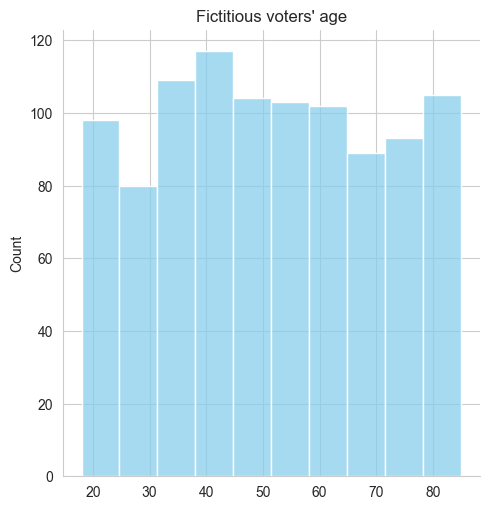

In [3]:
# Plotting an histogram
ax = sns.displot(x=a, bins=10, color='skyblue')
ax.set(title="Fictitious voters' age");

## Generating Samples

Let's define the function `generate_samples_b` to generate a DataFrame of samples from `sample_data`.

`np.random.choice()`: generates a random sample WITH replacement from a given 1-D array

In [4]:
def generate_samples_b(sample_data, num_samples=10000):
    '''    
    It generates num_samples samples using sample_data with the bootstrap method 
    and returns a DataFrame where each column is a sample.
    '''
    sample_size = len(sample_data)
    col = ['S'+str(k) for k in range(num_samples)]
    samp = np.random.choice(sample_data, replace=True, size=sample_size*num_samples)
    df = pd.DataFrame(samp.reshape(sample_size, num_samples), columns=col)
    return(df)

In [5]:
dfSamples = generate_samples_b(a)
print(dfSamples.shape)
dfSamples.head()

(1000, 10000)


,S0,S1,S2,S3,S4,...,S9995,S9996,S9997,S9998,S9999
0,23.302980,67.889236,40.685008,52.680772,24.714369,...,73.791985,40.434040,37.889672,38.170575,36.672060
1,53.100006,78.060520,24.400486,68.300084,33.576146,...,66.403707,31.152703,52.859458,42.410893,39.722849
2,31.688376,30.522551,81.927646,47.008945,71.448084,...,71.961595,23.584334,42.381096,42.489881,61.775446
3,62.785019,50.420566,35.714630,53.305023,44.271874,...,82.072906,47.008945,65.528841,67.119569,56.907785
4,51.330550,18.005486,68.070836,44.271874,84.152524,...,59.016017,33.589987,48.306814,68.934087,32.042661


## Confidence Intervals with Bootstrapping

Let's define a function using the bootstrap method for calculating a confidence interval.

In [6]:
def confidence_interval(sample_distribution, confidence):
    '''
    This function return a confidence% confidente interval using 
    sample_distribution as a sample distribution.
    '''
    alpha = 100 - confidence
    lower_percentile = alpha / 2.0    
    lower_limit = np.percentile(sample_distribution, lower_percentile)
    upper_percentile = lower_percentile + confidence
    upper_limit = np.percentile(sample_distribution, upper_percentile)
    return(lower_limit, upper_limit)

### Bootstrap Confident Intervals for `mean` and `median`

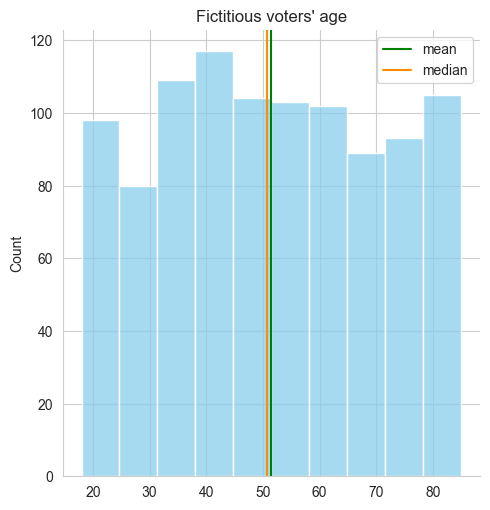

In [7]:
ax = sns.displot(x=a, bins=10, color='skyblue')
plt.axvline(x=a.mean(), color='green', label='mean')
plt.axvline(x=np.median(a), color='darkorange', label='median')
ax.set(title="Fictitious voters' age")
plt.legend();

In [8]:
# Calculating the mean and median scores for each generated sample
mean_scores   = np.array(dfSamples.mean())
median_scores = np.array(dfSamples.median())

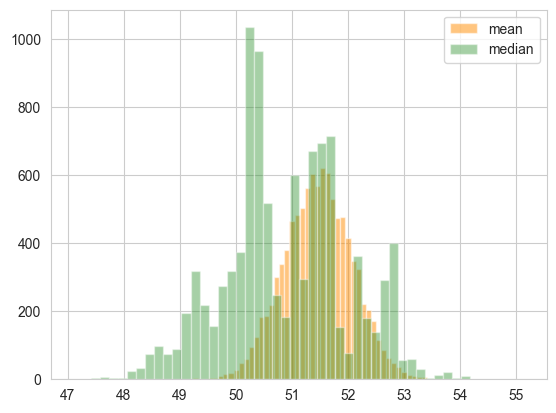

In [9]:
plt.hist(mean_scores,   bins=50, color='darkorange',  alpha=0.5, label='mean')
plt.hist(median_scores, bins=50, color='forestgreen', alpha=0.4, label='median')
plt.legend();

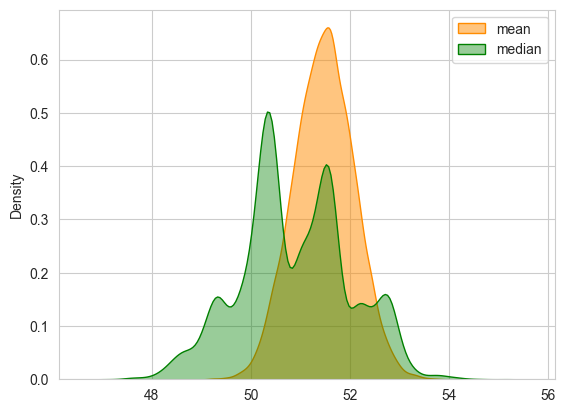

In [10]:
ax=sns.kdeplot(x=mean_scores,   color='darkorange', fill=True, alpha=0.5, label='mean')
ax=sns.kdeplot(x=median_scores, color='green',      fill=True, alpha=0.4, label='median')
plt.legend();

#### Bootstrap Confidence Interval for the `mean`

In [11]:
print('90% Confidence Interval (mean) =', np.round(confidence_interval(mean_scores, 90), 2))
print('95% Confidence Interval (mean) =', np.round(confidence_interval(mean_scores, 95), 2))
print('99% Confidence Interval (mean) =', np.round(confidence_interval(mean_scores, 99), 2))

90% Confidence Interval (mean) = [50.46 52.45]
95% Confidence Interval (mean) = [50.29 52.65]
99% Confidence Interval (mean) = [49.93 53.02]


#### Bootstrap Confidence Interval for the `median`

In [12]:
print('90% Confidence Interval (median) =', np.round(confidence_interval(median_scores, 90), 2))
print('95% Confidence Interval (median) =', np.round(confidence_interval(median_scores, 95), 2))
print('99% Confidence Interval (median) =', np.round(confidence_interval(median_scores, 99), 2))

90% Confidence Interval (median) = [49.1  52.76]
95% Confidence Interval (median) = [48.69 52.87]
99% Confidence Interval (median) = [48.25 53.61]


### Bootstrap Confident Intervals for the variance `var`, standard deviation `std`, and inter-quartile range `IQR`

In [13]:
var_scores  = np.array(dfSamples.var())
std_scores  = np.array(dfSamples.std())
IQR_scores  = np.array(dfSamples.quantile(0.75) - dfSamples.quantile(0.25))

#### Bootstrap Confidence Interval for `variance`

In [14]:
print('90% Confidence Interval (var) =', np.round(confidence_interval(var_scores, 90), 2))
print('95% Confidence Interval (var) =', np.round(confidence_interval(var_scores, 95), 2))
print('99% Confidence Interval (var) =', np.round(confidence_interval(var_scores, 99), 2))

90% Confidence Interval (var) = [347.12 382.21]
95% Confidence Interval (var) = [343.62 385.61]
99% Confidence Interval (var) = [337.42 392.58]


#### Bootstrap Confidence Interval for `standard deviation`

In [15]:
print('90% Confidence Interval (std) =', np.round(confidence_interval(std_scores, 90), 2))
print('95% Confidence Interval (std) =', np.round(confidence_interval(std_scores, 95), 2))
print('99% Confidence Interval (std) =', np.round(confidence_interval(std_scores, 99), 2))

90% Confidence Interval (std) = [18.63 19.55]
95% Confidence Interval (std) = [18.54 19.64]
99% Confidence Interval (std) = [18.37 19.81]


#### Bootstrap Confidence Interval for `Interquartile Range`

In [16]:
print('90% Confidence Interval (IQR) =', np.round(confidence_interval(IQR_scores, 90), 2))
print('95% Confidence Interval (IQR) =', np.round(confidence_interval(IQR_scores, 95), 2))
print('99% Confidence Interval (IQR) =', np.round(confidence_interval(IQR_scores, 99), 2))

90% Confidence Interval (IQR) = [29.85 33.68]
95% Confidence Interval (IQR) = [29.51 33.97]
99% Confidence Interval (IQR) = [28.91 34.5 ]


### Bootstrap Confident Intervals for the `skewness`, and `kurtosis`

In [17]:
skew_scores  = np.array(dfSamples.skew())
kurt_scores  = np.array(dfSamples.kurt())

#### Bootstrap Confidence Interval for `skewness`

In [18]:
print('90% Confidence Interval (skew) =', np.round(confidence_interval(skew_scores, 90), 2))
print('95% Confidence Interval (skew) =', np.round(confidence_interval(skew_scores, 95), 2))
print('99% Confidence Interval (skew) =', np.round(confidence_interval(skew_scores, 99), 2))

90% Confidence Interval (skew) = [-0.04  0.1 ]
95% Confidence Interval (skew) = [-0.06  0.12]
99% Confidence Interval (skew) = [-0.08  0.14]


#### Bootstrap Confidence Interval for `kurtosis`

In [19]:
print('90% Confidence Interval (kurt) =', np.round(confidence_interval(kurt_scores, 90), 2))
print('95% Confidence Interval (kurt) =', np.round(confidence_interval(kurt_scores, 95), 2))
print('99% Confidence Interval (kurt) =', np.round(confidence_interval(kurt_scores, 99), 2))

90% Confidence Interval (kurt) = [-1.19 -1.06]
95% Confidence Interval (kurt) = [-1.2  -1.05]
99% Confidence Interval (kurt) = [-1.22 -1.02]


## Graphical Confidence Intervals with Bootstrapping

Given the sample distribution, we can represent the confidence interval graphically. Let's see an example with the mean.

In [20]:
def graph_confidence_interval(sample_distribution, confidence=95, statistic_name='Mean'):
    '''
    It returns a confidence% confident interval using sample_distribution as a 
    sample distribution and presents the result graphically.
    '''
    alpha = 100 - confidence

    lower_alpha = alpha / 2.0    
    lower_limit = np.percentile(sample_distribution, lower_alpha)

    upper_alpha = lower_alpha + confidence
    upper_limit = np.percentile(sample_distribution, upper_alpha)

    sns.displot(sample_distribution, kde=True, height=3, aspect=1.5)    
    plt.title('(%s): %i%% CI = (%.2f, %.2f)'%(statistic_name, confidence, lower_limit, upper_limit))
    plt.axvline(x = lower_limit, ymin=0, ymax=0.5, color='orangered', linewidth=2)
    plt.axvline(x = upper_limit, ymin=0, ymax=0.5, color='orangered', linewidth=2);

#### Graphical Bootstrap Confidence Intervals for the `mean`

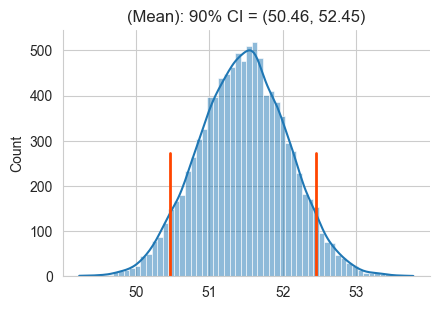

In [21]:
graph_confidence_interval(mean_scores, 90)

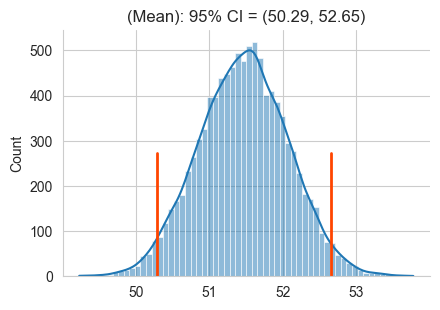

In [22]:
graph_confidence_interval(mean_scores, 95)

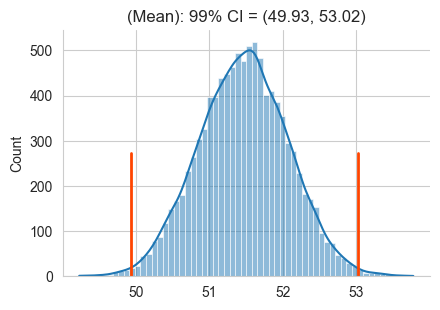

In [23]:
graph_confidence_interval(mean_scores, 99)

#### Other Graphical Bootstrap Confidence Intervals

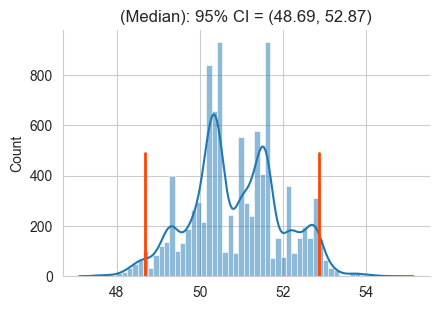

In [24]:
graph_confidence_interval(median_scores, 95, 'Median')

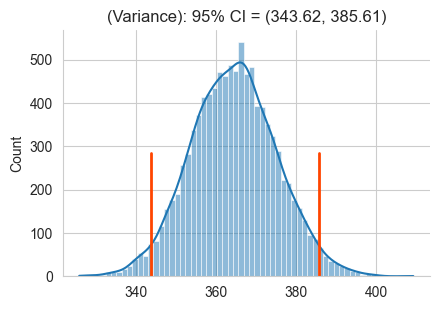

In [25]:
graph_confidence_interval(var_scores, 95, 'Variance')

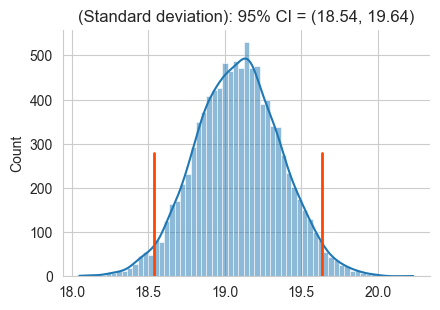

In [26]:
graph_confidence_interval(std_scores, 95, 'Standard deviation')

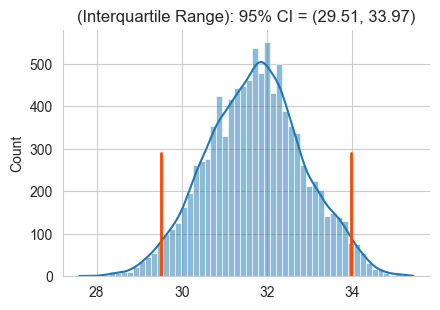

In [27]:
graph_confidence_interval(IQR_scores, 95, 'Interquartile Range')

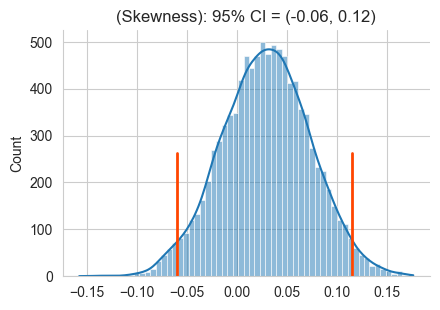

In [28]:
graph_confidence_interval(skew_scores, 95, 'Skewness')

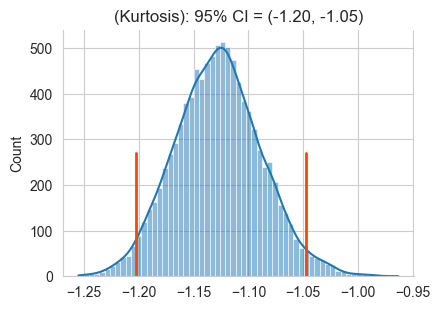

In [29]:
graph_confidence_interval(kurt_scores, 95, 'Kurtosis')

## Analyzing Student Performance dataset

In [30]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,...,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,...,3,6,5,6,6
1,GP,F,17,U,GT3,...,3,4,5,5,6
2,GP,F,15,U,LE3,...,3,10,7,8,10
3,GP,F,15,U,GT3,...,5,2,15,14,15
4,GP,F,16,U,GT3,...,5,4,6,10,10


Let's calculate the confidence interval for the mean of the variables:
- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

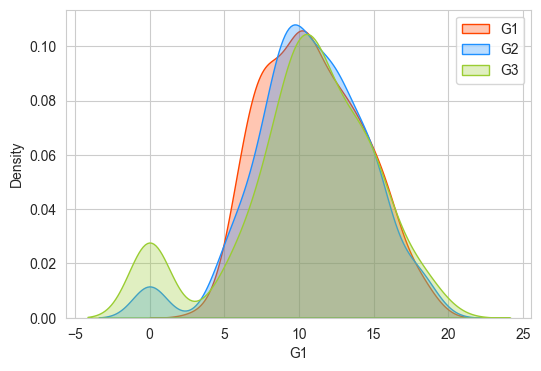

In [31]:
plt.figure(figsize=(6,4))
ax = sns.kdeplot(x=data.G1, color='orangered',   fill=True, alpha=0.3, label='G1')
ax = sns.kdeplot(x=data.G2, color='dodgerblue',  fill=True, alpha=0.3, label='G2')
ax = sns.kdeplot(x=data.G3, color='yellowgreen', fill=True, alpha=0.3, label='G3')
plt.legend();

#### G1

In [32]:
# Generating the sample distribution
df_G1 = generate_samples_b(data.G1)
print(df_G1.shape)
df_G1.head()

(395, 10000)


,S0,S1,S2,S3,S4,...,S9995,S9996,S9997,S9998,S9999
0,12,11,8,9,8,...,10,13,8,12,13
1,16,8,6,14,9,...,14,15,6,10,8
2,7,10,13,11,6,...,15,8,10,12,8
3,5,15,7,16,11,...,8,12,14,12,11
4,17,11,8,7,10,...,6,7,7,10,9


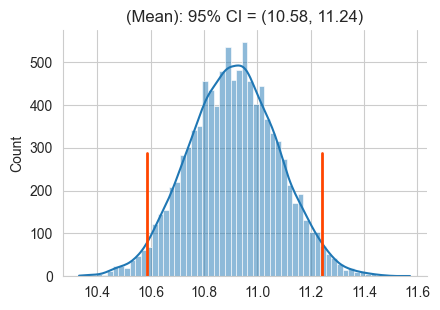

In [33]:
# Getting the graphical 95% confidence interval of G1
G1_scores = np.array(df_G1.mean())
graph_confidence_interval(G1_scores, 95)

#### G2

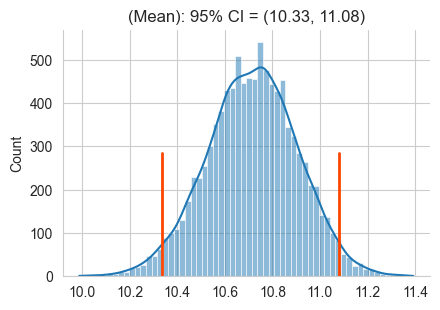

In [34]:
# Getting the graphical 95% confidence interval of G1
df_G2 = generate_samples_b(data.G2)
G2_scores = np.array(df_G2.mean())
graph_confidence_interval(G2_scores, 95)

#### G3

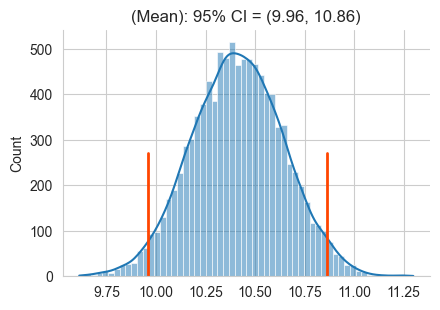

In [35]:
# Getting the graphical 95% confidence interval of G1
df_G3 = generate_samples_b(data.G3)
G3_scores = np.array(df_G3.mean())
graph_confidence_interval(G3_scores, 95)

## References

- Dekking, F.M. et.al. (2005) A Modern Introduction to Probability and Statistics, USA: Springer, chapter 18
- Comprehensive Confidence Intervals for Python Developers | Pythonic Excursions (aegis4048.github.io) [https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers]